<a href="https://colab.research.google.com/github/hafsana271/DataScienceAssignmnt/blob/main/Force_2020_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
d=pd.read_csv('/content/force2020_data.csv')
d.drop('NPHI',axis=1,inplace=True)
d.drop('PEF',axis=1,inplace=True)


df=pd.DataFrame(d)
df.head()

,RHOB,GR,DEPTH_MD,DTC
0,1.884186,80.200851,494.528,161.131180
1,1.889794,79.262886,494.680,160.603470
2,1.896523,74.821999,494.832,160.173615
3,1.891913,72.878922,494.984,160.149429
4,1.880034,71.729141,495.136,160.128342


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   DTC       18189 non-null  float64
dtypes: float64(4)
memory usage: 571.1 KB


In [ ]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
DTC,81


In [ ]:
df['DTC'].fillna(df['DTC'].median(), inplace=True)


In [ ]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
DTC,0


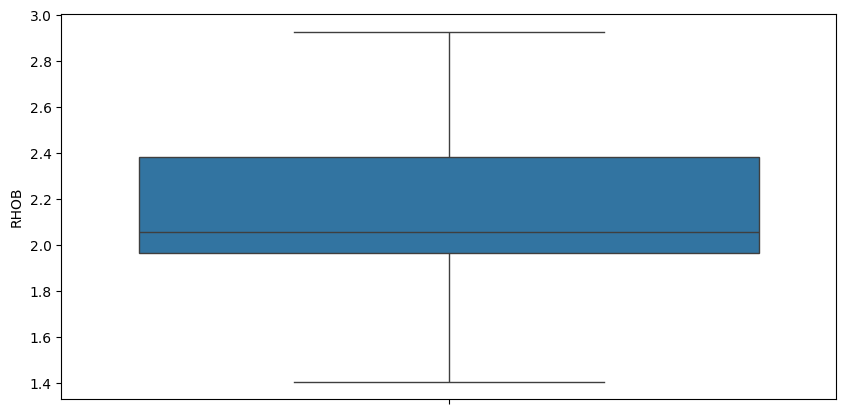

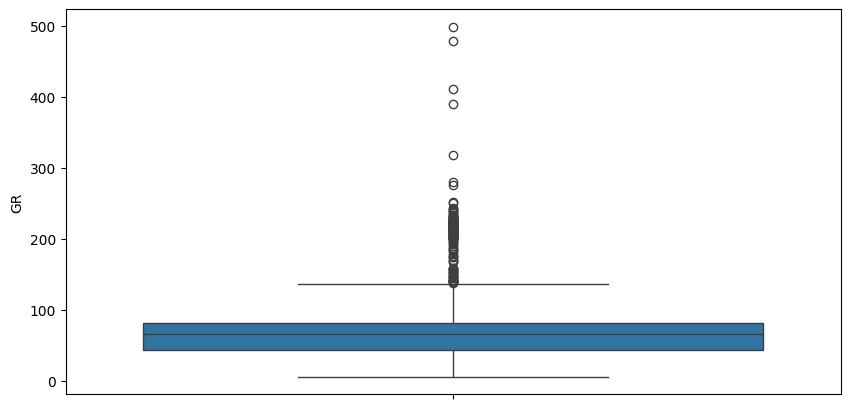

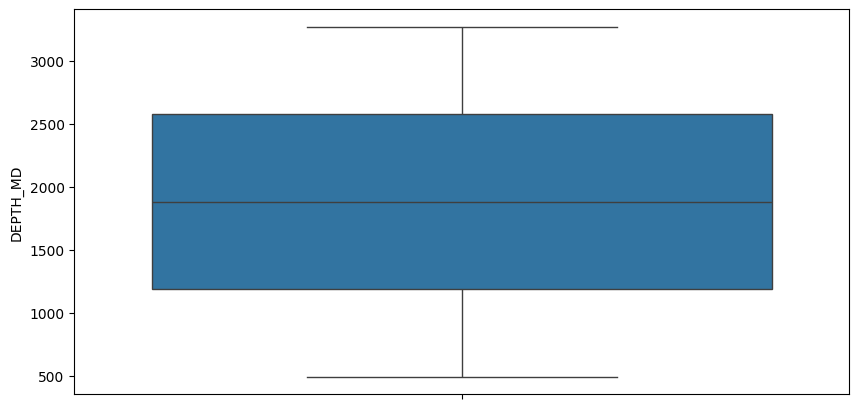

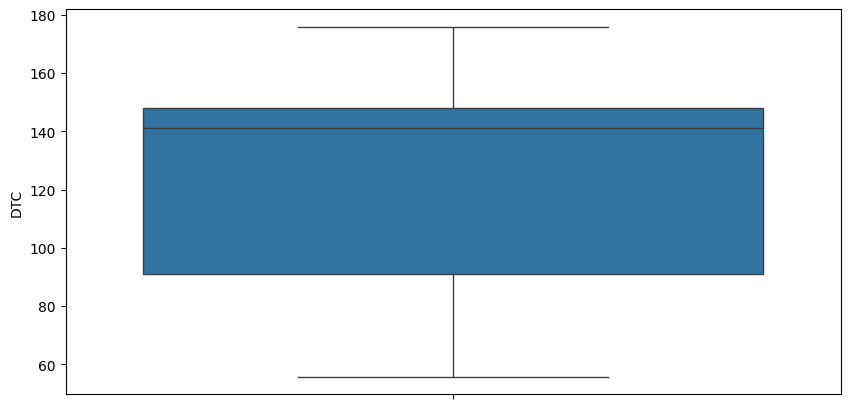

In [ ]:
for col in df.select_dtypes(include='float64'):
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.show()

In [ ]:
outlier_col=[]

for col in df.columns:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
  print(f"Number of outliers in {col}: {len(outliers)}")
  count=outliers.shape[0]

  if count>0:
    outlier_col.append(col)
print(outlier_col)

Number of outliers in RHOB: 0
Number of outliers in GR: 135
Number of outliers in DEPTH_MD: 0
Number of outliers in DTC: 0
['GR']


In [ ]:

for column in outlier_col:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df[column]=df[column].clip(lower=lower_bound,upper=upper_bound)

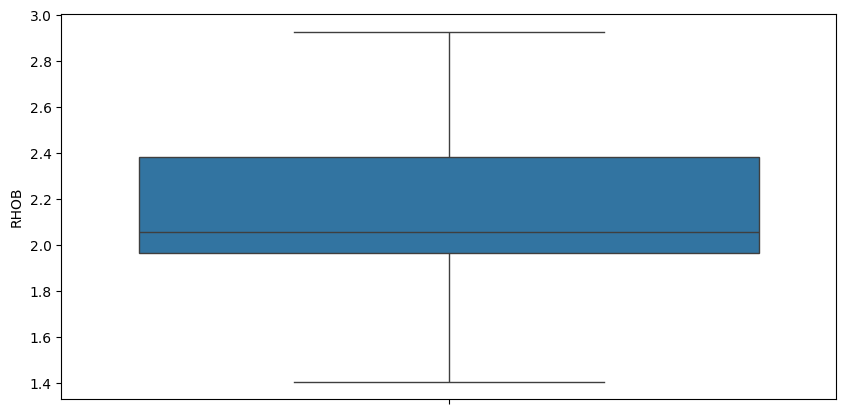

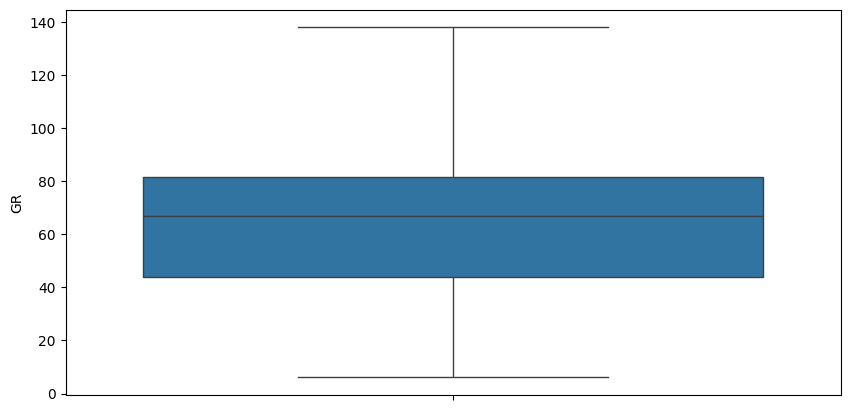

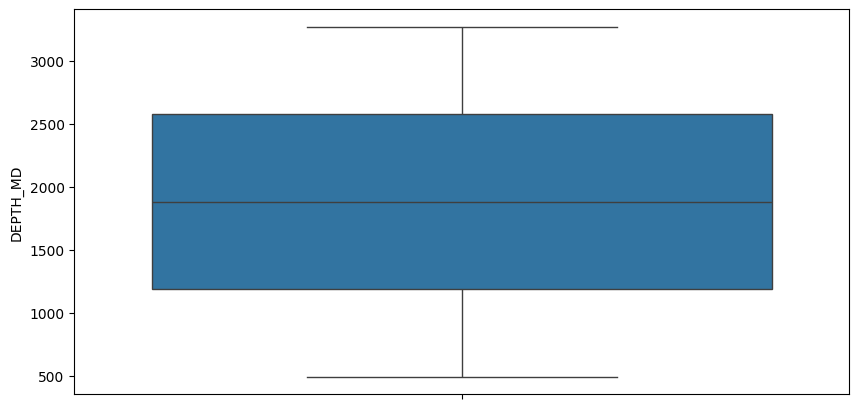

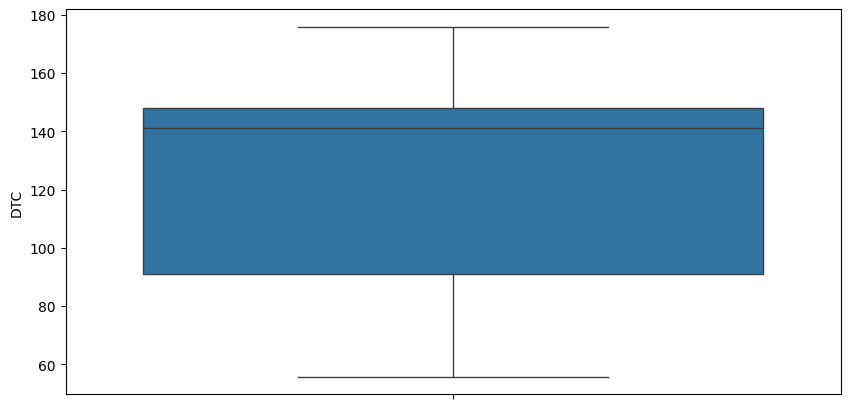

In [ ]:
for col in df.select_dtypes(include='float64'):
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,RHOB,GR,DEPTH_MD,DTC
0,-0.759999,0.648114,-1.731721,1.176153
1,-0.741163,0.612133,-1.731532,1.158889
2,-0.718560,0.441774,-1.731342,1.144827
3,-0.734045,0.367235,-1.731152,1.144036
4,-0.773944,0.323128,-1.730963,1.143346


In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [ ]:
pred_cluster=kmeans.predict(df_scaled)
pred_cluster

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42,init="k-means++",max_iter=300,n_init=10)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

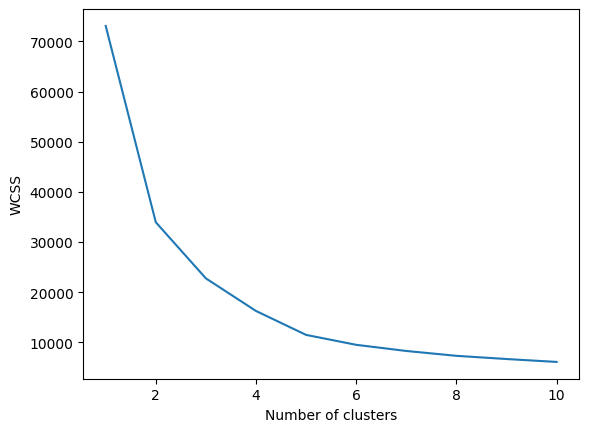

In [ ]:
#plotting elbow curve

plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal cluster : 2

In [ ]:
#Agglometrive Clustering

from sklearn.cluster import AgglomerativeClustering

agglo_cluster=AgglomerativeClustering(affinity='euclidean',linkage='ward')
y_agglo=agglo_cluster.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_agglo

array([1, 1, 1, ..., 0, 0, 0])

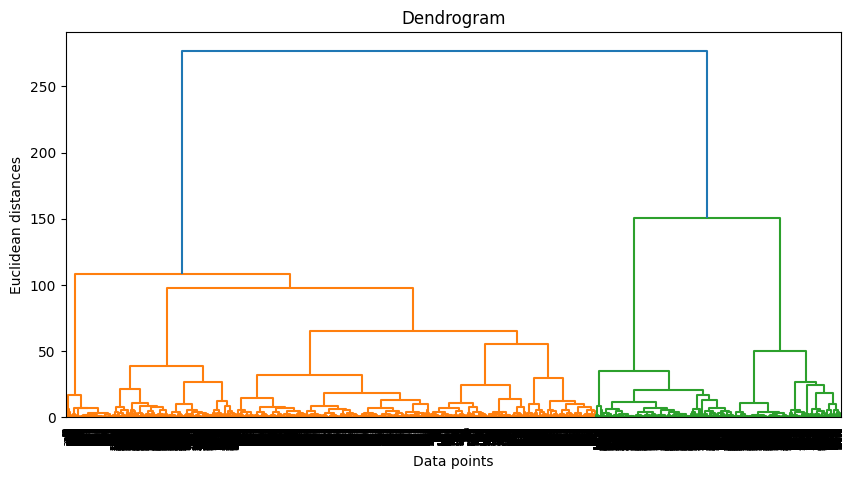

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

z=linkage(df_scaled,'ward')

plt.figure(figsize=(10,5))
dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')

plt.show()
